# ML프로젝트

In [246]:
import pandas as pd
import numpy as np

In [70]:
df_cutm = pd.read_csv('./cell2celltrain.csv', encoding='utf-8')

In [71]:
df_cutm_test = pd.read_csv('./cell2cellholdout.csv', encoding='utf-8')

In [72]:
df_cutm.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [73]:
df_cutm_test.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [74]:
df_cutm_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [75]:
df_cutm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

In [76]:
df_cutm.columns[df_cutm.isnull().any()]

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets',
       'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2'],
      dtype='object')

### nan값 존재 컬럼
- MonthlyRevenue : 월 수익       
- MonthlyMinutes  : 월 사용시간        
- TotalRecurringCharge : 월별 총 지불 요금    
- DirectorAssistedCalls : 디렉터 지원 통화   
- OverageMinutes : 초과 사용시간             
- RoamingCalls : 로밍 전화수          
- PercChangeMinutes :  사용시간%         
- PercChangeRevenues : 수익%
- ServiceArea 서비스 지역
- Handsets : 단말기
- HandsetModels : 단말기 모델
- CurrentEquipmentDays :현재 장비 사용일
- AgeHH1
- AgeHH2

### ../
- HandsetPrice 컬럼은 unknown이라는 문자열 존재
- 많은 컬럼이 존재하고, 정확히 어떤 의미는 가지고 있는지 모호한 컬럼들도 존재
- 결측치들을 그냥 제거할 것인지 아니며 적당한 값을 넣어 줄 것 인지 고민필요


______________________________________________________________________________________________________________________________________


In [77]:
# 라벨데이터 정리
Churn = {'Yes': 1,'No': 0} 
df_cutm.Churn = [Churn[item] for item in df_cutm.Churn] 

In [78]:
df_cutm['Churn']    

0        1
1        1
2        0
3        0
4        1
        ..
51042    1
51043    0
51044    1
51045    0
51046    0
Name: Churn, Length: 51047, dtype: int64

In [79]:
# nan값 행 드랍
df_cutm.dropna(axis=0, inplace=True)

In [82]:
# HandsetPrice컬럼은 삭제하기로 결정
df_cutm[df_cutm['HandsetPrice']=='Unknown'].shape

(28263, 58)

In [97]:
# Homeownership 삭제하기로 결정
df_cutm[df_cutm['Homeownership']=='Unknown'].shape[0]

16027

In [83]:
df_cutm.drop(columns='HandsetPrice', axis=1, inplace=True)

In [98]:
df_cutm.drop(columns='Homeownership', axis=1, inplace=True)

In [105]:
# 서비스지역이 유니크값이 너무 많긴 하다. 
df_cutm['ServiceArea'].unique()

743

In [189]:
df_cutm.drop(columns='ServiceArea', axis=1, inplace=True)

In [185]:
df_cutm['MaritalStatus'].unique()

array(['No', 'Yes', 'Unknown'], dtype=object)

In [186]:
# MaritalStatus 삭제하기로 결정
df_cutm[df_cutm['MaritalStatus']=='Unknown'].shape[0]

18649

In [187]:
df_cutm.drop(columns='MaritalStatus', axis=1, inplace=True)

In [192]:
df_cutm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49752 entries, 0 to 51043
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

In [282]:
df_cutm.reset_index(drop=True, inplace=True)

- nan값들 어떻게 처리할까? 고민하다. 데이터량이 충분하다고 판단하여 drop
- 전체데이터 약 5만개인데 거의 50%의 데이터가 '알수없음' 이므로 HandsetPrice컬럼은 삭제하기로 결정 + Homeownership + MaritalStatus
- ServiceArea는 너무많은 고유값이 존재 하는 string data. 고객 이탈 관련해서 뚜렷한 지표 되지 못할 것이고, 메모리 소비를 많이 하므로 drop
___________________________________________________________________________________________________________________________________

### 데이터 훑어 보기

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib import font_manager
f_path = "C:/windows/Fonts/malgun.ttf"
font_manager.FontProperties(fname=f_path).get_name()

from matplotlib import rc
rc("font", family="Malgun Gothic")

In [101]:
import plotly_express as px

fig = px.histogram(df_cutm, x='Churn')
fig.show()

0        61
1        58
2        60
3        59
4        53
         ..
51035    30
51037    30
51040    30
51041    30
51043    29
Name: MonthsInService, Length: 49752, dtype: int64

## 연속형 변수

In [435]:
continuous_col = [
'CustomerID',
'MonthlyRevenue',
'MonthlyMinutes',
'TotalRecurringCharge', 
'DirectorAssistedCalls',
'OverageMinutes',
'RoamingCalls',              
'PercChangeMinutes',
'PercChangeRevenues',
'DroppedCalls',         
'BlockedCalls',          
'UnansweredCalls',       
'CustomerCareCalls',
'ThreewayCalls',     
'ReceivedCalls',         
'OutboundCalls',  
'InboundCalls',           
'PeakCallsInOut',      
'OffPeakCallsInOut',        
'DroppedBlockedCalls',       
'CallForwardingCalls',  
'CallWaitingCalls',           
'MonthsInService',           
'UniqueSubs',             
'ActiveSubs',           
'Handsets',               
'HandsetModels',           
'CurrentEquipmentDays',     
'AgeHH1',              
'AgeHH2',
'RetentionCalls',
'RetentionOffersAccepted',
'ReferralsMadeBySubscriber',
'IncomeGroup',
'AdjustmentsToCreditRating'

 ]

In [372]:
continuous_col_corr = [
'CustomerID',
'Churn',
'MonthlyRevenue',
'MonthlyMinutes',
'TotalRecurringCharge', 
'DirectorAssistedCalls',
'OverageMinutes',
'RoamingCalls',              
'PercChangeMinutes',
'PercChangeRevenues',
'DroppedCalls',         
'BlockedCalls',          
'UnansweredCalls',       
'CustomerCareCalls',
'ThreewayCalls',     
'ReceivedCalls',         
'OutboundCalls',  
'InboundCalls',           
'PeakCallsInOut',      
'OffPeakCallsInOut',        
'DroppedBlockedCalls',       
'CallForwardingCalls',  
'CallWaitingCalls',           
'MonthsInService',           
'UniqueSubs',             
'ActiveSubs',           
'Handsets',               
'HandsetModels',           
'CurrentEquipmentDays',     
'AgeHH1',              
'AgeHH2',
'RetentionCalls',
'RetentionOffersAccepted',
'ReferralsMadeBySubscriber',
'IncomeGroup',
'AdjustmentsToCreditRating'

 ]

In [373]:
len(continuous_col_corr)

36

In [374]:
continuous_col_corr_Churn= df_cutm[continuous_col_corr].corr()['Churn']
continuous_col_corr_Churn

CustomerID                  -0.040186
Churn                        1.000000
MonthlyRevenue              -0.012065
MonthlyMinutes              -0.050165
TotalRecurringCharge        -0.058945
DirectorAssistedCalls       -0.019714
OverageMinutes               0.015301
RoamingCalls                 0.010955
PercChangeMinutes           -0.033194
PercChangeRevenues           0.013015
DroppedCalls                -0.015062
BlockedCalls                -0.004474
UnansweredCalls             -0.028192
CustomerCareCalls           -0.035331
ThreewayCalls               -0.023716
ReceivedCalls               -0.037097
OutboundCalls               -0.032489
InboundCalls                -0.033855
PeakCallsInOut              -0.039527
OffPeakCallsInOut           -0.040955
DroppedBlockedCalls         -0.012353
CallForwardingCalls         -0.003161
CallWaitingCalls            -0.025509
MonthsInService              0.017544
UniqueSubs                   0.032839
ActiveSubs                   0.013049
Handsets    

In [375]:
continuous_col_corr_Churn.sort_values(ascending=False)

Churn                        1.000000
CurrentEquipmentDays         0.102513
RetentionCalls               0.058422
RetentionOffersAccepted      0.034511
UniqueSubs                   0.032839
MonthsInService              0.017544
OverageMinutes               0.015301
ActiveSubs                   0.013049
PercChangeRevenues           0.013015
RoamingCalls                 0.010955
CallForwardingCalls         -0.003161
BlockedCalls                -0.004474
ReferralsMadeBySubscriber   -0.011390
MonthlyRevenue              -0.012065
DroppedBlockedCalls         -0.012353
IncomeGroup                 -0.012982
DroppedCalls                -0.015062
AdjustmentsToCreditRating   -0.016123
AgeHH2                      -0.017577
DirectorAssistedCalls       -0.019714
ThreewayCalls               -0.023716
CallWaitingCalls            -0.025509
UnansweredCalls             -0.028192
AgeHH1                      -0.028761
OutboundCalls               -0.032489
PercChangeMinutes           -0.033194
Handsets    

In [376]:
continuous_col_corr_Churn.sort_values(ascending=True)

TotalRecurringCharge        -0.058945
MonthlyMinutes              -0.050165
OffPeakCallsInOut           -0.040955
HandsetModels               -0.040470
CustomerID                  -0.040186
PeakCallsInOut              -0.039527
ReceivedCalls               -0.037097
CustomerCareCalls           -0.035331
InboundCalls                -0.033855
Handsets                    -0.033730
PercChangeMinutes           -0.033194
OutboundCalls               -0.032489
AgeHH1                      -0.028761
UnansweredCalls             -0.028192
CallWaitingCalls            -0.025509
ThreewayCalls               -0.023716
DirectorAssistedCalls       -0.019714
AgeHH2                      -0.017577
AdjustmentsToCreditRating   -0.016123
DroppedCalls                -0.015062
IncomeGroup                 -0.012982
DroppedBlockedCalls         -0.012353
MonthlyRevenue              -0.012065
ReferralsMadeBySubscriber   -0.011390
BlockedCalls                -0.004474
CallForwardingCalls         -0.003161
RoamingCalls

In [377]:
continuous_col_corr_Churn.abs().sort_values(ascending=False)[1:].head(20)

CurrentEquipmentDays       0.102513
TotalRecurringCharge       0.058945
RetentionCalls             0.058422
MonthlyMinutes             0.050165
OffPeakCallsInOut          0.040955
HandsetModels              0.040470
CustomerID                 0.040186
PeakCallsInOut             0.039527
ReceivedCalls              0.037097
CustomerCareCalls          0.035331
RetentionOffersAccepted    0.034511
InboundCalls               0.033855
Handsets                   0.033730
PercChangeMinutes          0.033194
UniqueSubs                 0.032839
OutboundCalls              0.032489
AgeHH1                     0.028761
UnansweredCalls            0.028192
CallWaitingCalls           0.025509
ThreewayCalls              0.023716
Name: Churn, dtype: float64

#### 상대적으로 고객이탈과 높은 상관계수를 가진 컬럼

- CurrentEquipmentDays : 현제사용중인 장비
- TotalRecurringCharge : 월별 요금
- RetentionCalls : Retention call            
- MonthlyMinutes :  월간 사용시간(분)        
- OffPeakCallsInOut :
- HandsetModels : 핸드셋모델
- CustomerID : 고객 아이디
- PeakCallsInOut :
- ReceivedCalls : 수신한 전화 수
- CustomerCareCalls : 고객 케어 전화 수                      

C:\Users\Parknamgyu\AppData\Local\Temp\ipykernel_25164\4008775493.py:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Parknamgyu\AppData\Local\Temp\ipykernel_25164\4008775493.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Parknamgyu\AppData\Local\Temp\ipykernel_25164\4008775493.py:9: UserWarning:



Text(0.5, 1.0, 'Churn for MonthlyMinutes')

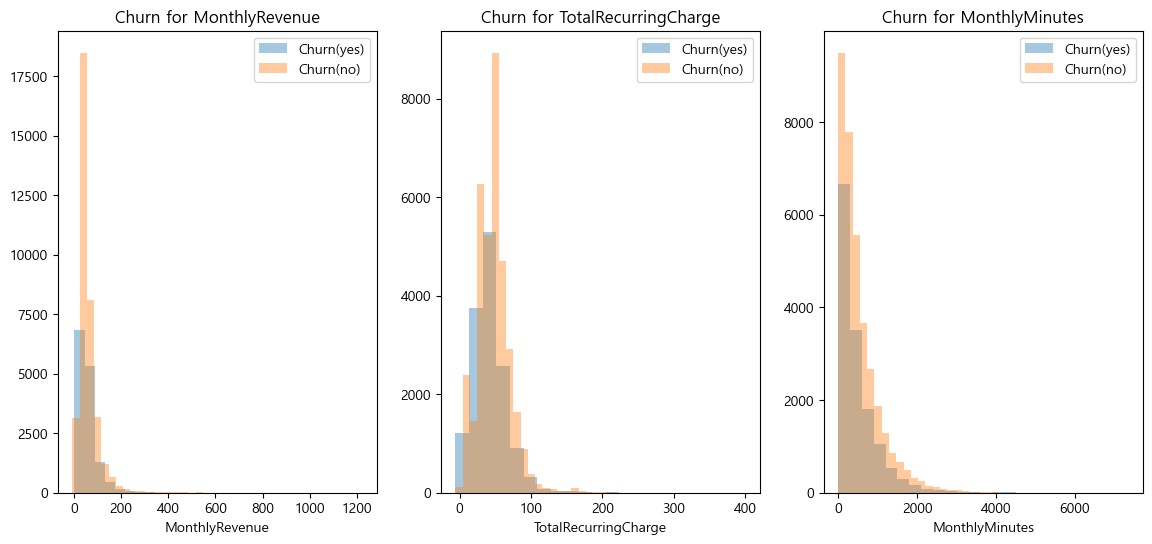

In [318]:
# 월별 수익, 월별 요금, 월별사용량에 따른 이탈
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(14,6))


ax = sns.distplot(df_cutm[df_cutm['Churn']==1]['MonthlyRevenue'], bins=20, label ='Churn(yes)', ax=axes[0], kde=False )
ax = sns.distplot(df_cutm[df_cutm['Churn']==0]['MonthlyRevenue'], bins=40, label ='Churn(no)', ax=axes[0], kde=False )
ax.legend(); ax.set_title('Churn for MonthlyRevenue')

ax = sns.distplot(df_cutm[df_cutm['Churn']==1]['TotalRecurringCharge'], bins=18, label ='Churn(yes)', ax=axes[1], kde=False )
ax = sns.distplot(df_cutm[df_cutm['Churn']==0]['TotalRecurringCharge'], bins=40, label ='Churn(no)', ax=axes[1], kde=False )
ax.legend(); ax.set_title('Churn for TotalRecurringCharge')

ax = sns.distplot(df_cutm[df_cutm['Churn']==1]['MonthlyMinutes'], bins=18, label ='Churn(yes)', ax=axes[2], kde=False )
ax = sns.distplot(df_cutm[df_cutm['Churn']==0]['MonthlyMinutes'], bins=40, label ='Churn(no)', ax=axes[2], kde=False )
ax.legend(); ax.set_title('Churn for MonthlyMinutes')

- 데이터가 편향되어 있긴 하지만 특정 구간에서 데이터가 모여있다.
- robustScaler를 통해 median을 0으로 만들어서 편향을 없애는 방법도 가능할 것 같다.

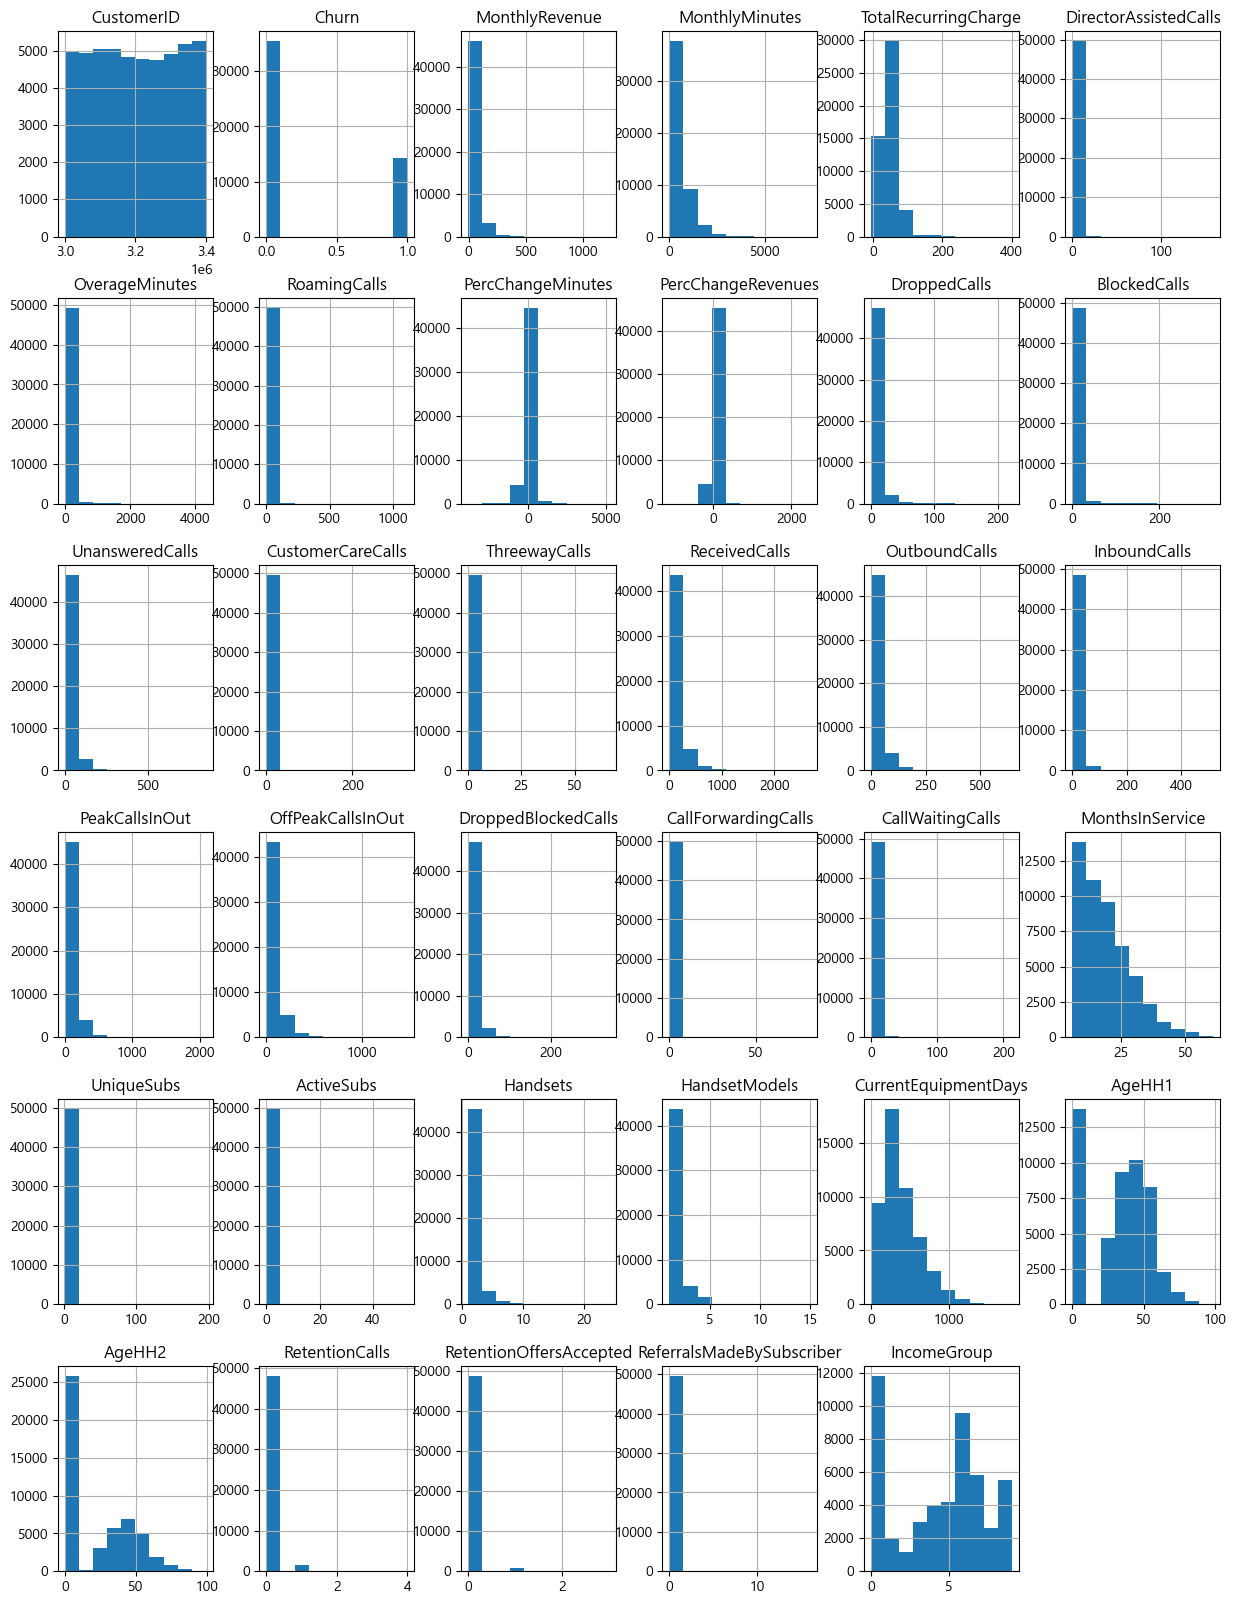

In [319]:
import  matplotlib.pyplot as plt

df_cutm[continuous_col].hist( figsize=(15,20));

In [358]:
df_cutm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

- 연속형변수에는 편향되어 있는 값들이 많다.
- ageHH1, ageHH2는 비정상적 값이 많아보인다.
- robust or standard가 적절해 보인다.

In [320]:
df_cutm['RetentionCalls'].unique()


array([1, 0, 3, 2, 4], dtype=int64)

## binary 변수

In [328]:
binary_cols = ['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 
               'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 
               'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam']
for i in binary_cols :
    df_cutm[i] = df_cutm[i].replace({'Yes' : 1, 'No' : 0})


In [329]:
len(binary_cols)

15

In [330]:
binary_cols_corr=['ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder', 
               'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 
               'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'Churn']

corr_data_Churn= df_cutm[binary_cols_corr].corr()['Churn']

In [331]:
corr_data =df_cutm[binary_cols_corr].corr()

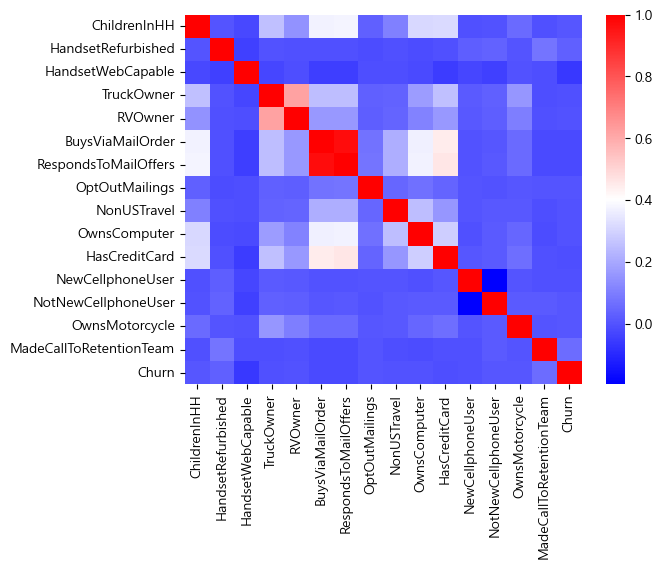

In [332]:
sns.heatmap(data = corr_data,  cmap='bwr');
plt.show()

In [333]:
# 상관계수 확인
corr_data_Churn.sort_values(ascending=False)

Churn                      1.000000
MadeCallToRetentionTeam    0.060577
HandsetRefurbished         0.030026
ChildrenInHH               0.009505
OwnsMotorcycle             0.007700
NotNewCellphoneUser        0.006900
OptOutMailings             0.000880
OwnsComputer              -0.001231
NonUSTravel               -0.002816
RVOwner                   -0.003280
TruckOwner                -0.004873
NewCellphoneUser          -0.007639
HasCreditCard             -0.009204
BuysViaMailOrder          -0.021884
RespondsToMailOffers      -0.023082
HandsetWebCapable         -0.062409
Name: Churn, dtype: float64

In [334]:
# 음의 상관계수 확인 
corr_data_Churn.sort_values(ascending=True)

HandsetWebCapable         -0.062409
RespondsToMailOffers      -0.023082
BuysViaMailOrder          -0.021884
HasCreditCard             -0.009204
NewCellphoneUser          -0.007639
TruckOwner                -0.004873
RVOwner                   -0.003280
NonUSTravel               -0.002816
OwnsComputer              -0.001231
OptOutMailings             0.000880
NotNewCellphoneUser        0.006900
OwnsMotorcycle             0.007700
ChildrenInHH               0.009505
HandsetRefurbished         0.030026
MadeCallToRetentionTeam    0.060577
Churn                      1.000000
Name: Churn, dtype: float64

In [335]:
# 절대값으로 확인
corr_data_Churn.abs().sort_values(ascending=False)[1:]

HandsetWebCapable          0.062409
MadeCallToRetentionTeam    0.060577
HandsetRefurbished         0.030026
RespondsToMailOffers       0.023082
BuysViaMailOrder           0.021884
ChildrenInHH               0.009505
HasCreditCard              0.009204
OwnsMotorcycle             0.007700
NewCellphoneUser           0.007639
NotNewCellphoneUser        0.006900
TruckOwner                 0.004873
RVOwner                    0.003280
NonUSTravel                0.002816
OwnsComputer               0.001231
OptOutMailings             0.000880
Name: Churn, dtype: float64

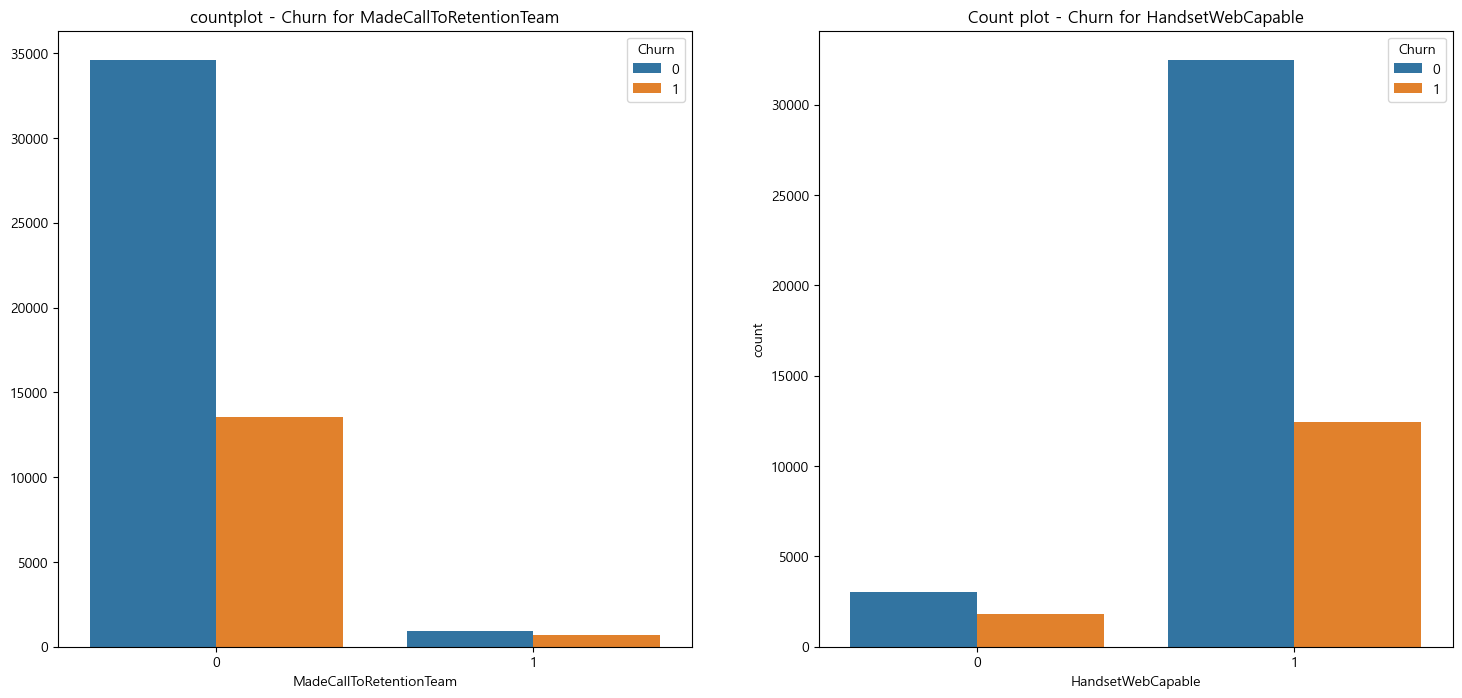

In [336]:
f, ax =plt.subplots(1,2,figsize=(18, 8))
sns.countplot(x='MadeCallToRetentionTeam',hue='Churn', data=df_cutm, ax=ax[0])
ax[0].set_title('countplot - Churn for MadeCallToRetentionTeam')
ax[0].set_ylabel('')

sns.countplot(x='HandsetWebCapable',hue='Churn', data=df_cutm, ax=ax[1])
ax[1].set_title('Count plot - Churn for HandsetWebCapable')

plt.show()

- MadeCallToRetentionTeam :고객유지팀에 전화를 하지않고 이탈을 한 사람들 약 14000명, 고객유지팀에 연락을 한 고객 중 절반 이상이 이탈하였다.(전화를 한 고객이 적다는 것은 불만사항이 적다고는 말할 수 있으나 고객유지팀이 역할을 잘 수행하는 의문)

- HandsetWebCapable : HandsetWebCapable을 사용한 고객들과, 사용 안한 고객의 이탈 비율을 봤을 떄. 사용한 쪽이 더 나은 고객 유지를 보였다.


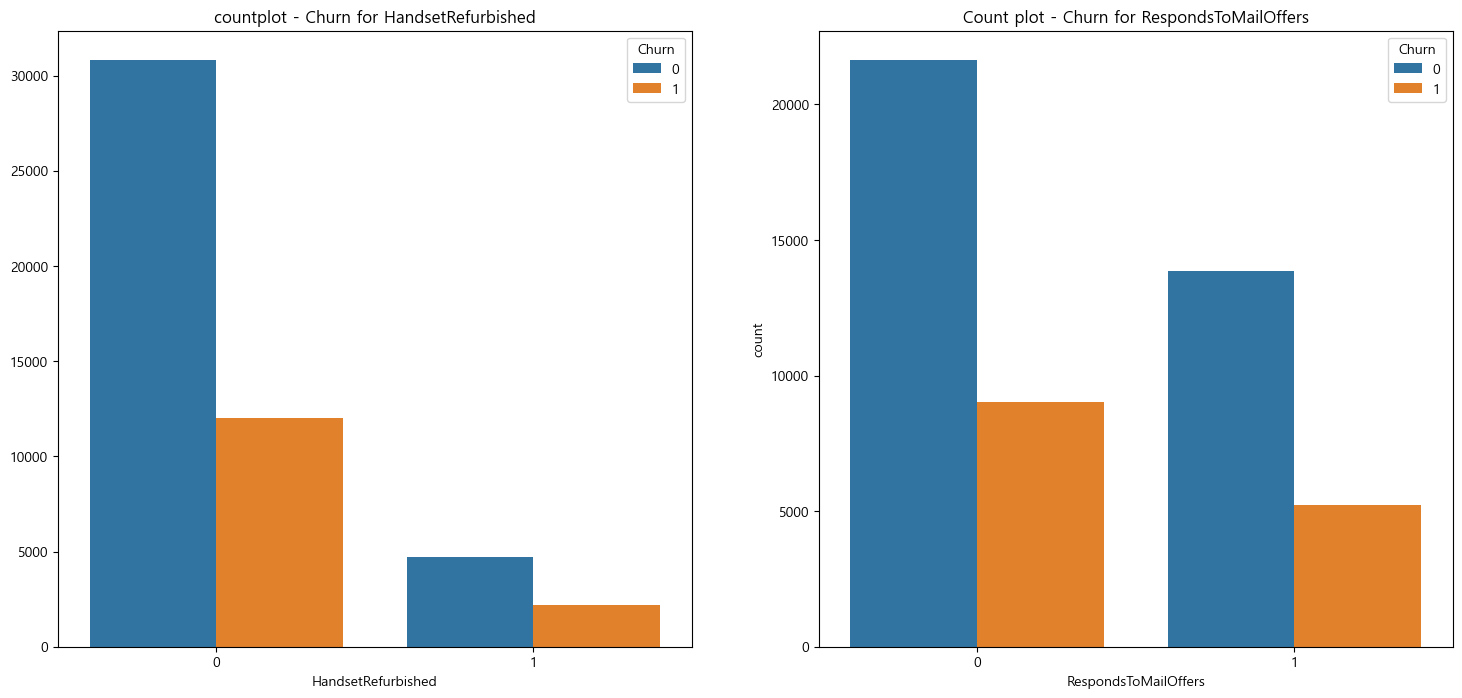

In [337]:
f, ax =plt.subplots(1,2,figsize=(18, 8))
sns.countplot(x='HandsetRefurbished',hue='Churn', data=df_cutm, ax=ax[0])
ax[0].set_title('countplot - Churn for HandsetRefurbished')
ax[0].set_ylabel('')

sns.countplot(x='RespondsToMailOffers',hue='Churn', data=df_cutm, ax=ax[1])
ax[1].set_title('Count plot - Churn for RespondsToMailOffers')

plt.show()

- HandsetRefurbished : 사용하는 않은 고객들이 더 많고, 사용을 한 고객이 이탈 비율이 좀더 높다.
- RespondsToMailOffers: 메일 제안에 응답한 고객과 응답을 하지 않은 고객 둘다 비슷한 이탈관련 비율을 보인다

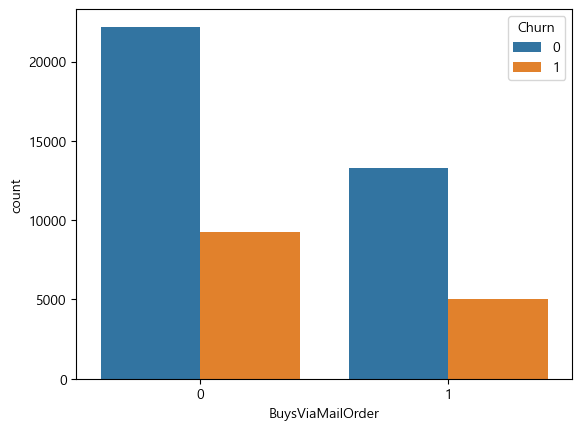

In [338]:
sns.countplot(x='BuysViaMailOrder',hue='Churn', data=df_cutm)
plt.show()

-BuysViaMailOrder : 우편주문을 안한 사람이 더 많고 이탈관련 비율은 비슷하다.

#### binary중 고객이탈 상관관계가 높은 Feature
- MadeCallToRetentionTeam : 고객이탈방어팀에 전화 여부 , 
- HandsetWebCapable : 헤드셋 웹기능 사용여부,
- HandsetRefurbished  : 리퍼브 헤드셋 사용여부.
- RespondsToMailOffers : 메일 제안에 응답 여부,
- BuysViaMailOrder : 우편주문을 통한 구매여부 
___________________________________________________________________________________________________________________________________________________________      

In [339]:
df_cutm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  int64  
 1   Churn                      49752 non-null  int64  
 2   MonthlyRevenue             49752 non-null  float64
 3   MonthlyMinutes             49752 non-null  float64
 4   TotalRecurringCharge       49752 non-null  float64
 5   DirectorAssistedCalls      49752 non-null  float64
 6   OverageMinutes             49752 non-null  float64
 7   RoamingCalls               49752 non-null  float64
 8   PercChangeMinutes          49752 non-null  float64
 9   PercChangeRevenues         49752 non-null  float64
 10  DroppedCalls               49752 non-null  float64
 11  BlockedCalls               49752 non-null  float64
 12  UnansweredCalls            49752 non-null  float64
 13  CustomerCareCalls          49752 non-null  flo

## categorical 변수

In [340]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [341]:
le

LabelEncoder()

In [342]:
train_cat = df_cutm[['CreditRating', 'PrizmCode', 'Occupation']]
le_train_cat = train_cat.apply(le.fit_transform)
le_train_cat['Churn'] = df_cutm['Churn']

In [343]:
le_train_cat

,CreditRating,PrizmCode,Occupation,Churn
0,0,2,4,1
1,3,2,4,1
2,2,3,1,0
3,3,0,3,0
4,0,0,4,1
...,...,...,...,...
49747,1,0,4,0
49748,2,0,3,0
49749,0,0,4,0
49750,4,0,4,1


In [344]:


label_data_Churn= le_train_cat.corr()['Churn']

In [345]:
label_data_Churn

CreditRating   -0.047741
PrizmCode       0.005204
Occupation     -0.005276
Churn           1.000000
Name: Churn, dtype: float64

In [346]:
label_data=le_train_cat.corr()

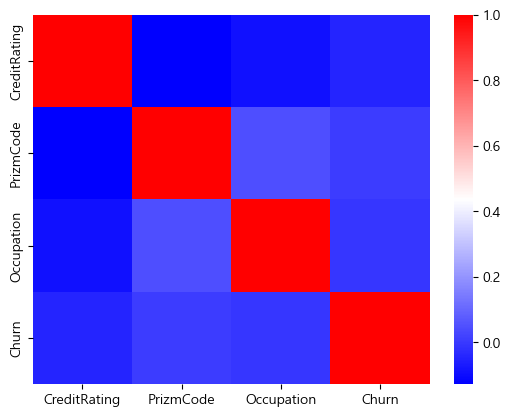

In [347]:
# 히트맵 확인
sns.heatmap(data = label_data, cmap='bwr');
plt.show()

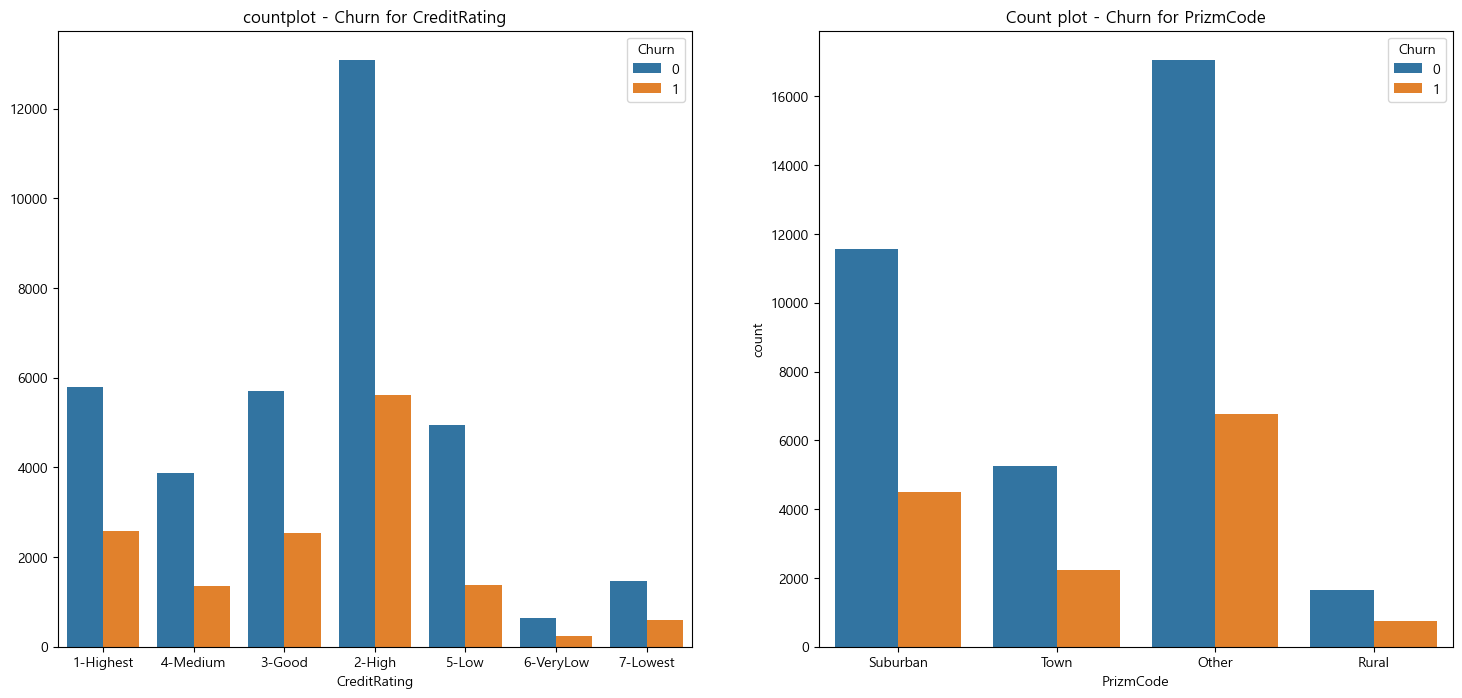

In [348]:
f, ax =plt.subplots(1,2,figsize=(18, 8))
sns.countplot(x='CreditRating',hue='Churn', data=df_cutm, ax=ax[0])
ax[0].set_title('countplot - Churn for CreditRating')
ax[0].set_ylabel('')

sns.countplot(x='PrizmCode',hue='Churn', data=df_cutm, ax=ax[1])
ax[1].set_title('Count plot - Churn for PrizmCode')

plt.show()

- CreditRating : 신용등급에 따른 고객이탈비율이다. 2등급의 고객이 가장 많고, 눈의 띄는 이탈비율을 가진 신용등급은 보이지 않는다.
- PrizmCode : other로 분류된 데이터가 가장 많고, PrizmCode에 따른 이탈비율 중 의미를 가진 것은 없어보인다.


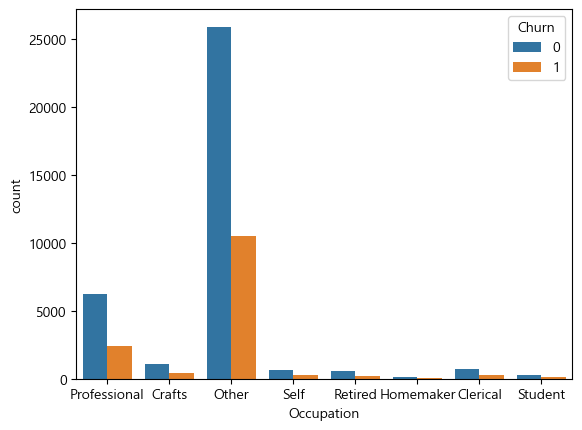

In [349]:
sns.countplot(x='Occupation',hue='Churn', data=df_cutm)
plt.show()

- Occupation : Other로 집계된 데이터가 압도적으로 많다. 이탈관련해서 얻을 정보는 없어보인다.

## 데이터 프레임 만들기
- 연속형 데이터 standard scaler or robust scaler 적용
- 이진형 데이터 0, 1로 변환
- categorical 데이터 LabelEncoder로 형변환 

In [380]:
df_cutm_ss = pd.DataFrame(data=cutm_ss, columns=continuous_col)


In [381]:
df_cutm[binary_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ChildrenInHH             49752 non-null  int64
 1   HandsetRefurbished       49752 non-null  int64
 2   HandsetWebCapable        49752 non-null  int64
 3   TruckOwner               49752 non-null  int64
 4   RVOwner                  49752 non-null  int64
 5   BuysViaMailOrder         49752 non-null  int64
 6   RespondsToMailOffers     49752 non-null  int64
 7   OptOutMailings           49752 non-null  int64
 8   NonUSTravel              49752 non-null  int64
 9   OwnsComputer             49752 non-null  int64
 10  HasCreditCard            49752 non-null  int64
 11  NewCellphoneUser         49752 non-null  int64
 12  NotNewCellphoneUser      49752 non-null  int64
 13  OwnsMotorcycle           49752 non-null  int64
 14  MadeCallToRetentionTeam  49752 non-null  int64
dtypes:

In [383]:
df_cutm_ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49752 entries, 0 to 49751
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 49752 non-null  float64
 1   MonthlyRevenue             49752 non-null  float64
 2   MonthlyMinutes             49752 non-null  float64
 3   TotalRecurringCharge       49752 non-null  float64
 4   DirectorAssistedCalls      49752 non-null  float64
 5   OverageMinutes             49752 non-null  float64
 6   RoamingCalls               49752 non-null  float64
 7   PercChangeMinutes          49752 non-null  float64
 8   PercChangeRevenues         49752 non-null  float64
 9   DroppedCalls               49752 non-null  float64
 10  BlockedCalls               49752 non-null  float64
 11  UnansweredCalls            49752 non-null  float64
 12  CustomerCareCalls          49752 non-null  float64
 13  ThreewayCalls              49752 non-null  flo

## 모델 적용
- 1. 모든 컬럼을 기준으로 분류모델을 돌려 분류할 떄 중요하게 작용한 컬럼을 선별
- 2. 중요컬럼을 이용한 학습
- 3. 무엇이 더 나은 모델인가 선별

### 사용모델
- RamdomFroest : bagging의 대표적인 방법으로 성능이 뛰어나고 결측치 다루기가 쉬움
- LightGBM : 속도가 빠르고 데이터가 충분히 많을때 높은 성능

  

In [401]:
# 분류기의 성능을 return하는 함수 하나 작성

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)

def get_clf_eval(y_test, pred):
    acc = accuracy_score(y_test, pred)
    pre = precision_score(y_test, pred)
    re = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

    return acc,pre,re,f1,auc

In [402]:
# 성능 출력 함수 작성

from sklearn.metrics import confusion_matrix

def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confustin_matrix')
    print(confusion)
    print('=========')

    print('Accuracy : {0:.4f}, Precision : {1:.4f}'. format(acc, pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'. format(re, f1,auc ))

In [403]:
def print_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    acc, pre, re, f1, auc = get_clf_eval(y_test, pred)

    print('=> confustin_matrix')
    print(confusion)
    print('=========')

    print('Accuracy : {0:.4f}, Precision : {1:.4f}'. format(acc, pre))
    print('Recall : {0:.4f}, F1 : {1:.4f}, AUC : {2:.4f}'. format(re, f1,auc ))

In [556]:
X = df_cutm_train.drop('Churn', axis=1)
y = df_cutm_train['Churn']

In [557]:
X.shape, y.shape[0]

((49752, 53), 49752)

In [572]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [573]:
tmp=np.unique(y_train, return_counts=True)[1]
print(tmp[1]/len(y_train)*100,'%')

28.630907942341928 %


In [574]:
# 모든컬럼 
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier

rs = RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.fit_transform(X_test)




In [575]:
# 리콜이 엉망이다
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

In [576]:
print_clf_eval(y_test, rf_pred)

=> confustin_matrix
[[10413   239]
 [ 3983   291]]
Accuracy : 0.7171, Precision : 0.5491
Recall : 0.0681, F1 : 0.1211, AUC : 0.5228


## 데이터 불균형 해결을 위한 SMOTE기법
- 클래스 불균형 해소
- 정보 손실을 감소하고 overfitting 감소

In [579]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (34826, 53) (34826,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (49710, 53) (49710,)
SMOTE 적용 후 값의 분포 :
 0    24855
1    24855
Name: Churn, dtype: int64


In [565]:
X_train=rs.fit_transform(X_train_over)
X_test=rs.fit_transform(X_test)

In [566]:
# RandomForestClassifier smote 적용 Accuracy가 떨어지고 Recall이 올라간다.
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train_over, y_train_over)
rf_pred = rf_clf.predict(X_test)
print_clf_eval(y_test, rf_pred)

=> confustin_matrix
[[5829 4823]
 [2299 1975]]
Accuracy : 0.5228, Precision : 0.2905
Recall : 0.4621, F1 : 0.3568, AUC : 0.5047


c:\Users\Parknamgyu\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [597]:
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=100, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [593]:
# smote 전
print_clf_eval(y_test, lgbm_pred)

=> confustin_matrix
[[9842  810]
 [3447  827]]
Accuracy : 0.7148, Precision : 0.5052
Recall : 0.1935, F1 : 0.2798, AUC : 0.5587


In [594]:
lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=100, boost_from_average=False)
lgbm_clf.fit(X_train_over, y_train_over)
lgbm_pred = lgbm_clf.predict(X_test)

In [595]:
# smote 후
print_clf_eval(y_test, lgbm_pred)

=> confustin_matrix
[[8534 2118]
 [2690 1584]]
Accuracy : 0.6779, Precision : 0.4279
Recall : 0.3706, F1 : 0.3972, AUC : 0.5859


## PermutationImportance를 통한 중요피쳐확인
- feature importance는 가지에 몇번 등장하는지, 혹은 불순도가 얼마나 낮추는지 알려주는 지표, 문제점은 부정적인 영향을 주는 피쳐인지는 알수 없다
- PermutationImportance는 모델을 학습 시킨 뒤 , 특성들의 예측 성능 확인가능

In [542]:
# f1 스코어를 중점으로 랜덤포레스트에서 중요하게 작용한 상위 35feature들 확인
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf_clf,scoring = 'f1', random_state=13).fit(X_test, y_test)
eli5.show_weights(perm,top=35, feature_names=X_test.columns.tolist())

Weight,Feature
0.0368 ± 0.0105,CurrentEquipmentDays
0.0289 ± 0.0068,MonthsInService
0.0241 ± 0.0064,MonthlyMinutes
0.0109 ± 0.0059,CustomerID
0.0090 ± 0.0048,PeakCallsInOut
0.0071 ± 0.0047,CustomerCareCalls
0.0061 ± 0.0014,Handsets
0.0059 ± 0.0071,OverageMinutes
0.0049 ± 0.0033,InboundCalls
0.0049 ± 0.0039,CreditRating


In [543]:
rf_ipt_feature = ['CurrentEquipmentDays',
'MonthsInService',
'MonthlyMinutes',
'CustomerID',
'PeakCallsInOut',
'CustomerCareCalls',
'Handsets',
'OverageMinutes',
'InboundCalls',
'CreditRating',
'PercChangeRevenues',
'AgeHH2',
'RetentionCalls',
'DirectorAssistedCalls',
'MadeCallToRetentionTeam',
'RoamingCalls',
'OffPeakCallsInOut',
'UniqueSubs',
'HandsetModels',
'Occupation',
'PrizmCode',
'TruckOwner',
'HandsetWebCapable',
'ActiveSubs',
'AdjustmentsToCreditRating',
'NonUSTravel',
'AgeHH1',
'RVOwner',
'ChildrenInHH',
'OwnsComputer',
'RespondsToMailOffers',
'ReferralsMadeBySubscriber',
'NotNewCellphoneUser',
'RetentionOffersAccepted',
'ThreewayCalls',
'Churn']

In [552]:
X = df_cutm_train[rf_ipt_feature].drop('Churn', axis=1)
y = df_cutm_train['Churn']

In [553]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [554]:
X_train.shape, y_train.shape

((34826, 35), (34826,))

In [550]:
rs = RobustScaler()
X_train=rs.fit_transform(X_train)
X_test=rs.fit_transform(X_test)

In [555]:
rf_clf = RandomForestClassifier(random_state=13, n_jobs=-1, n_estimators=100)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print_clf_eval(y_test, rf_pred)

=> confustin_matrix
[[10333   319]
 [ 3906   368]]
Accuracy : 0.7169, Precision : 0.5357
Recall : 0.0861, F1 : 0.1484, AUC : 0.5281


In [601]:
X_test = pd.DataFrame(X_test,columns=X.columns)

In [611]:
X_test

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation
0,-0.984332,-0.464817,-0.608303,-0.500000,0.000000,-0.05,0.0,0.436242,0.488636,-0.447761,...,0.0,1.0,0.0,0.666667,0.0,1.0,0.0,-0.5,-0.5,3.0
1,0.898394,-0.362864,-0.487365,0.000000,-0.252525,-0.05,2.0,0.201342,0.170455,0.000000,...,1.0,0.0,0.0,-0.833333,0.0,0.0,0.0,1.0,0.0,0.0
2,0.570683,2.803426,0.662455,-0.366667,1.000000,6.10,0.0,0.073826,7.011364,0.552239,...,0.0,0.0,0.0,-0.666667,0.0,0.0,0.0,1.0,0.0,0.0
3,0.759133,-0.377390,-0.167870,-0.166667,-0.252525,0.10,13.5,-0.664430,-0.522727,-0.044776,...,0.0,0.0,0.0,-0.833333,0.0,0.0,0.0,1.0,-0.5,0.0
4,0.373160,-0.236519,-0.624549,0.166667,-0.252525,-0.05,0.0,-0.080537,0.034091,-0.447761,...,0.0,0.0,0.0,-0.833333,0.0,0.0,0.0,1.0,-0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14921,-0.533639,0.044673,-0.077617,0.166667,0.000000,-0.05,0.0,-0.288591,0.011364,0.791045,...,0.0,1.0,0.0,0.166667,0.0,0.0,0.0,0.5,0.0,0.0
14922,0.159987,-0.474135,-0.259928,-0.500000,-0.252525,-0.05,3.0,-0.657718,-0.113636,0.447761,...,0.0,0.0,0.0,-0.833333,0.0,0.0,0.0,2.5,-0.5,0.0
14923,-0.171797,-0.450291,-0.330325,-0.500000,-0.252525,-0.05,0.0,-0.583893,-0.363636,-0.343284,...,0.0,1.0,0.0,-0.833333,0.0,0.0,0.0,2.5,-0.5,0.0
14924,-0.482127,-0.548681,1.055957,-1.166667,-0.252525,1.70,0.0,0.872483,-2.079545,0.000000,...,0.0,1.0,0.0,-0.166667,0.0,0.0,0.0,0.0,-0.5,0.0


In [607]:
y_test = pd.DataFrame(y_test,columns=['Churn'])

In [608]:
y_test

,Churn
6,0
47562,1
38834,0
43796,1
33910,1
...,...
11387,1
28760,0
20654,1
12688,1


In [609]:

perm = PermutationImportance(lgbm_clf,scoring = 'f1', random_state=13).fit(X_test, y_test)
eli5.show_weights(perm,top=35, feature_names=X_test.columns.tolist())

Weight,Feature
0.0322 ± 0.0075,CurrentEquipmentDays
0.0221 ± 0.0049,PeakCallsInOut
0.0217 ± 0.0069,MonthsInService
0.0129 ± 0.0057,InboundCalls
0.0111 ± 0.0023,AgeHH1
0.0097 ± 0.0054,PercChangeRevenues
0.0096 ± 0.0047,OutboundCalls
0.0096 ± 0.0045,BlockedCalls
0.0078 ± 0.0085,ReceivedCalls
0.0076 ± 0.0040,ChildrenInHH


In [610]:
lgbm_ipt_feature = ['CurrentEquipmentDays',
'PeakCallsInOut',
'MonthsInService',
'InboundCalls',
'AgeHH1',
'PercChangeRevenues',
'OutboundCalls',
'BlockedCalls',
'ReceivedCalls',
'ChildrenInHH',
'TruckOwner',
'AgeHH2',
'PrizmCode',
'NewCellphoneUser',
'DirectorAssistedCalls',
'IncomeGroup',
'RoamingCalls',
'RetentionCalls',
'OwnsComputer',
'OverageMinutes',
'HasCreditCard',
'NotNewCellphoneUser',
'Occupation',
'RespondsToMailOffers'
'HandsetWebCapable',
'ReferralsMadeBySubscriber',
'CallForwardingCalls',
'MadeCallToRetentionTeam','Churn']

In [612]:
X = df_cutm_train[rf_ipt_feature].drop('Churn', axis=1)
y = df_cutm_train['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=100, boost_from_average=False)
lgbm_clf.fit(X_train, y_train)
lgbm_pred = lgbm_clf.predict(X_test)

In [613]:
# 중요피쳐들로만 
print_clf_eval(y_test, lgbm_pred)

=> confustin_matrix
[[9702  950]
 [3492  782]]
Accuracy : 0.7024, Precision : 0.4515
Recall : 0.1830, F1 : 0.2604, AUC : 0.5469


In [614]:
smote = SMOTE(random_state=13)
X_train_over, y_train_over = smote.fit_resample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (34826, 35) (34826,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (49710, 35) (49710,)
SMOTE 적용 후 값의 분포 :
 0    24855
1    24855
Name: Churn, dtype: int64


In [615]:
lgbm_clf = LGBMClassifier(random_state=13, n_jobs=-1, n_estimators=1000, num_leaves=100, boost_from_average=False)
lgbm_clf.fit(X_train_over, y_train_over)
lgbm_pred = lgbm_clf.predict(X_test)

In [616]:
print_clf_eval(y_test, lgbm_pred)

=> confustin_matrix
[[9585 1067]
 [3395  879]]
Accuracy : 0.7011, Precision : 0.4517
Recall : 0.2057, F1 : 0.2826, AUC : 0.5527
